In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random


<center>

# TP1 - Mariage stable
2024/2025 - T. Godin, L. Naert
IUT de Vannes, BUT Informatique

</center>

## Généralités
Le problème des mariages stables consiste à trouver une façon stable de mettre en couple les éléments d'une population 1 ($P_1$) avec les éléments d'une population 2 ($P_2$) sachant que chaque élément de $P_1$ et de $P_2$ fournit une liste de ses préférences pour le couplage. 

L'exemple classique est l'affectation d'étudiants dans une formation après le bac (problème de ParcoursSup). Les étudiants font un classement des formations post-bac, les formations font un classement des étudiants et l'on cherche des mariages stables. 

Une situation est dite instable s'il y a au moins un étudiant et une formation post-bac qui préféreraient se mettre en couple plutôt que de rester avec leurs "partenaires" actuels. 

__Par exemple__ : `Jean-Pierre` est affecté à l'IUT de _Lannion_ et `Robert` à l'IUT de _Vannes_ alors que `Jean-Pierre` préfère l'IUT de _Vannes_ à l'IUT de _Lannion_ et l'IUT de _Vannes_ préfère `Jean-Pierre` à `Robert`. 

Durant ce TP, vous implémenterez l'algorithme de Gale–Shapley qui permet de trouver une solution stable au problème des mariages. Vous appliquerez cet algorithme au problème des affectations d'étudiants dans des formations. 

Le code ci-dessous donne des exemples de listes de préférence stockée dans des dictionnaires: 

In [33]:
etudiantPref = {0:[4, 1, 2, 0, 3], 1:[2, 3, 0, 1, 4], 2:[4, 0, 1, 2, 3], 3:[3, 1, 4, 0, 2], 4:[3, 4, 1, 2, 0]}
print(f"Nombre d'étudiants : {len(etudiantPref)}")

formationPref = {1:[3, 4, 0, 2, 1], 2:[1, 3, 0, 4, 2], 3:[1, 4, 3, 2, 0], 0:[2, 1, 0, 3, 4], 4:[3, 1, 4, 2, 0]}
print(f"Nombre de formations : {len(formationPref)}")


Nombre d'étudiants : 5
Nombre de formations : 5


<tt>etudiantPref</tt> liste les préférences de chaque étudiant.

<tt>formationPref</tt> liste les préférences de chaque formation.

L'étudiant n°0 préfère la formation n°4, puis la n°1, la n°2, la n°0 et enfin, la n°3. 

L'étudiant n°1 préfère la formation n°2, puis la n°3, la n°0, la n°1 et enfin, la n°4. 
etc.

Idem pour les formations.
La formation n° 0 préfère l'étudiant n°2, puis le n°1, le n°0, le n°3 et enfin, le n°4. 
etc.


__Pour chacune des questions avec un <tt>try/assert</tt>, nous vous demandons de rajouter des cas de test pertinents.__

Quelques fonctions utiles pour utiliser un dictionnaire : 

In [34]:
# Exemple de dictionnaire simple
dico = {6:18, 3:5, 0:24, 2:18, 5:25}

# Pour avoir la valeur associé à une certaine clef (ici, clef = 3) :
print(f"Valeur associé à la clef 3 : {dico[3]}")

# Pour avoir la liste des clefs :
print(f"Liste des clefs : {list(dico.keys())}")

# Pour avoir la liste des valeurs :
print(f"Liste des valeurs : {list(dico.values())}")

# Pour avoir la clef associée à la première occurence d'une certaine valeur
print(f"Clef associée à la valeur 18 : {list(dico.keys())[list(dico.values()).index(18)]}")
print(f"Clef associée à la valeur 25 : {list(dico.keys())[list(dico.values()).index(25)]}")
print(f"Clef associée à la valeur 24 : {list(dico.keys())[list(dico.values()).index(24)]}")


Valeur associé à la clef 3 : 5
Liste des clefs : [6, 3, 0, 2, 5]
Liste des valeurs : [18, 5, 24, 18, 25]
Clef associée à la valeur 18 : 6
Clef associée à la valeur 25 : 5
Clef associée à la valeur 24 : 0


> __Question 1 (mise en place)__ : 
Ecrire un bout de code pour afficher la liste des préférences de l'étudiant n°2, la liste des préférences de la formation n°0, la formation préféré de l'étudiant n°3 et le numéro de la formation dont la liste de préférence est $1, 4, 3, 2, 0$

In [35]:
etudiantPref = {0:[4, 1, 2, 0, 3], 1:[2, 3, 0, 1, 4], 2:[4, 0, 1, 2, 3], 3:[3, 1, 4, 0, 2], 4:[3, 4, 1, 2, 0]}
formationPref = {1:[3, 4, 0, 2, 1], 2:[1, 3, 0, 4, 2], 3:[1, 4, 3, 2, 0], 0:[2, 1, 0, 3, 4], 4:[3, 1, 4, 2, 0]}

# 1. Afficher la liste des préférences de l'étudiant n°2
print(f"Liste des préférences de l'étudiant n°2 : {etudiantPref[2]}")

# 2. Afficher la liste des préférences de la formation n°0
print(f"Liste des préférences de la formation n°0 : {formationPref[0]}")

# 3. Afficher la formation préférée de l'étudiant n°3
print(f"La formation préférée de l'étudiant n°3 : {etudiantPref[3][0]}")

# 4. Trouver le numéro de la formation dont la liste de préférence est [1, 4, 3, 2, 0]
for formation, preferences in formationPref.items():
    if preferences == [1, 4, 3, 2, 0]:
        print(f"Le numéro de la formation avec la liste de préférences [1, 4, 3, 2, 0] : {formation}")

        break


Liste des préférences de l'étudiant n°2 : [4, 0, 1, 2, 3]
Liste des préférences de la formation n°0 : [2, 1, 0, 3, 4]
La formation préférée de l'étudiant n°3 : 3
Le numéro de la formation avec la liste de préférences [1, 4, 3, 2, 0] : 3


> __Question 2 (préférence)__ : Ecrire une fonction `prefer(pref,c1,c2)` qui renvoie `True` si `c1` est préféré à `c2` d'après la liste des préférence `pref`.

In [36]:
def prefer(pref, c1, c2):
    """
    Renvoie True si c1 est préféré à c2 d'après la liste des préférences pref.
    
    :param array pref: la liste de préférences
    :param int c1: premier individu
    :param int c2: deuxième individu   
    :return: True si c1 est préféré à c2, False sinon
    :rtype: bool
    """

    # On vérifie la position de c1 et c2 dans la liste de préférences.
    return pref.index(c1) < pref.index(c2)

try:
    etudiantPref = {0:[4, 1, 2, 0, 3], 1:[2, 3, 0, 1, 4], 2:[4, 0, 1, 2, 3], 3:[3, 1, 4, 0, 2], 4:[3, 4, 1, 2, 0]}
    formationPref = {1:[3, 4, 0, 2, 1], 2:[1, 3, 0, 4, 2], 3:[1, 4, 3, 2, 0], 0:[2, 1, 0, 3, 4], 4:[3, 1, 4, 2, 0]}
    assert prefer(etudiantPref[0],0,1) == False
    assert prefer(etudiantPref[1],0,1) == True
    assert prefer(etudiantPref[2],0,1) == True
    assert prefer(etudiantPref[3],0,1) == False
    assert prefer(etudiantPref[4],0,1) == False
    print("prefer : OK")
except:
    print("prefer : ERREUR")


prefer : OK


Un mariage est également un dictionnaire où les couples (clef, valeur) représente un mariage entre un individu de $P_1$ (clef) et un individu de $P_2$ (valeur). Un exemple est donné ci-dessous : 

In [37]:
mariage = {0:0, 2:4, 4:-1, 3:1, 1:2}


Si l'on considère que $P_1$ rassemble les étudiants et $P_2$ les formations. On voit par exemple que l'étudiant 2 est marié à la formation 4 et l'étudiant 4 n'est pas marié (associé à la valeur $-1$).

> __Question 3 (mariage)__ : Ecrire une fonction `marriedTo(marriage, e, isP1)` qui renvoie l'identifiant du partenaire de <tt>e</tt> d'après la liste de mariages <tt>marriage</tt>, et -1 s'il n'est pas marié. Attention : <tt>e</tt> appartient à $P_1$ si <tt>isP1</tt> est à <tt>True</tt> et à $P_2$ sinon. 

In [38]:
def marriedTo(marriage, e, isP1):
    """
    Renvoie l'identifiant du partenaire de e d'après le dictionnaire des mariages marriage,
    et -1 s'il n'est pas marié.
    
    :param dictionary marriage: la liste des mariages actuels
    :param int e: élément de P1 ou de P2
    :param bool isP1: permet de connaître le rôle de e (P1 ou P2)
    :return: l'identifiant du partenaire de e d'après marriage
    :rtype: int
    """

    if isP1:
        # Si e appartient à P1, on cherche sa valeur dans le dictionnaire.
        return marriage.get(e, -1)
    else:
        # Si e appartient à P2, on cherche la clé ayant pour valeur e.
        for key, value in marriage.items():
            if value == e:
                return key

        return -1

try:
    mariage = {0:0, 2:4, 4:-1, 3:1, 1:2}
    assert marriedTo(mariage, 1, True) == 2
    assert marriedTo(mariage, 1, False) == 3
    assert marriedTo(mariage, 4, True) == -1
    assert marriedTo(mariage, 4, False) == 2
    assert marriedTo(mariage, 3, True) == 1
    assert marriedTo(mariage, 3, False) == -1
    print("marriedTo : OK")
except:
    print("marriedTo : ERREUR")


marriedTo : OK


## Algorithme de Gale-Shapley

L'algorithme de Gale-Shapley permet de donner une solution au problème des mariages stables. Il fonctionne de manière itérative jusqu'à ce que chacun ait un partenaire.

Au départ, les étudiants (i.e. éléments de $P_1$) et les formations (i.e. éléments de $P_2$) ne sont pas appariés.

Pour chaque étudiant non "marié" : 

- l'étudiant propose le "mariage" à la formation en haut de sa liste (indice = 0) : 

    - Si la formation est "célibataire", elle accepte le mariage.
    - Si la formation est "mariée" : 
        - Si le couple précédent est instable, elle accepte le nouveau mariage
        - sinon l'étudiant demande à la formation suivante (indice = indice + 1)


> __Question 4 (Gale-Shapley)__ : Ecrire une fonction `galeShapley(p1Pref,p2Pref):` qui renvoie une proposition de mariage suivant l'agorithme de Gale-Shapley en fonction des disctionnaires de préférences de $P_1$ (i.e etudiantPref) et de $P_2$ (i.e formationPref).

In [39]:
def galeShapley(p1Pref, p2Pref):
    """
    Renvoie un dictionnaire de mariages stables suivant l'algorithme de Gale-Shapley.
    
    :param dictionnaire p1Pref: le dictionnaire des préférences des individus de P1
    :param dictionnaire p2Pref: le dictionnaire des préférences des individus de P2
    :return: dictionnaire de mariages stables
    :rtype: dictionnaire
    """
    
    # Initialisation : tous les étudiants (P1) sont célibataires
    single_p1 = list(p1Pref.keys())  # Liste des individus de P1 non encore mariés
    marriage = {p1: -1 for p1 in p1Pref}  # Dictionnaire des mariages avec -1 pour les non mariés
    engaged = {p2: -1 for p2 in p2Pref}  # Les formations (P2) sont également célibataires au départ
    next_proposal = {p1: 0 for p1 in p1Pref}  # Garde une trace de la prochaine formation à proposer
    
    while single_p1:  # Tant qu'il y a des étudiants non mariés
        student = single_p1[0]  # Prendre un étudiant non marié
        # Trouver la prochaine formation à qui l'étudiant va proposer
        preferred_formation = p1Pref[student][next_proposal[student]]
        next_proposal[student] += 1  # On met à jour la prochaine proposition à faire

        # Si la formation est célibataire, elle accepte directement la proposition
        if engaged[preferred_formation] == -1:
            marriage[student] = preferred_formation
            engaged[preferred_formation] = student
            single_p1.pop(0)  # Cet étudiant est maintenant marié
        else:
            # Si la formation est déjà mariée, elle doit comparer les préférences
            current_student = engaged[preferred_formation]

            if p2Pref[preferred_formation].index(student) < p2Pref[preferred_formation].index(current_student):
                # La formation préfère le nouvel étudiant
                marriage[student] = preferred_formation
                marriage[current_student] = -1  # L'ancien étudiant devient célibataire
                single_p1[0] = current_student  # On remplace le célibataire actuel par l'ancien
                engaged[preferred_formation] = student  # La formation est maintenant engagée avec le nouvel étudiant
            else:
                # La formation préfère rester avec l'étudiant actuel
                pass  # L'étudiant reste célibataire et proposera à une autre formation

    return marriage

try:
    e1Pref = {0:[4, 1, 2, 0, 3], 1:[2, 3, 0, 1, 4], 2:[4, 0, 1, 2, 3], 3:[3, 1, 4, 0, 2], 4:[3, 4, 1, 2, 0]}
    f1Pref = {1:[3, 4, 0, 2, 1], 2:[1, 3, 0, 4, 2], 3:[1, 4, 3, 2, 0], 0:[2, 1, 0, 3, 4], 4:[3, 1, 4, 2, 0]}
    assert galeShapley(e1Pref, f1Pref) == {0: 0, 1: 2, 2: 4, 3: 1, 4: 3}
    e2Pref={0:[0,1,2],1:[0,2,1],2:[2,0,1]}
    f2Pref={0:[1,2,0],1:[0,2,1],2:[1,2,0]}
    assert galeShapley(e2Pref, f2Pref) == {0: 1, 1: 0, 2: 2}
    print("galeShapley : OK")
except:
    print("galeShapley : ERREUR")


galeShapley : OK


## Analyse

Pour étudier les mariages obtenus, nous avons besoin d'utiliser l'algorithme sur plusieurs exemples. 

> __Question 5 (Préférences aléatoires)__ : 
Ecrire une fonction `dicoPrefGenerator(n)` qui renvoie un dictionnaire de <tt>n</tt> listes de préférences contenant des nombres aléatoires de 0 à n-1 (sans doublons dans une même liste). 

Par exemple : `dicoPrefGenerator(5)` pourrait renvoyer `{0: [0, 3, 2, 4, 1], 1: [1, 0, 3, 4, 2], 2: [4, 0, 2, 3, 1], 3: [2, 0, 3, 1, 4], 4: [3, 0, 4, 1, 2]}`

In [40]:
def dicoPrefGenerator(n):
    """
    Renvoie un dictionnaire de n listes de préférences aléatoires contenant des nombres de 0 à n-1.
    
    :param int n: le nombre d'individus
    :return: un dictionnaire de préférences aléatoires
    :rtype: dict
    """

    dicoPref = {}

    for i in range(n):
        # Générer une liste de tous les entiers de 0 à n-1
        preferences = list(range(n))
        # Mélanger la liste pour obtenir une liste aléatoire sans doublons
        random.shuffle(preferences)
        # Ajouter la liste mélangée dans le dictionnaire
        dicoPref[i] = preferences

    return dicoPref

print(f"Exemple de dico aléatoire : {dicoPrefGenerator(7)}")


Exemple de dico aléatoire : {0: [6, 0, 3, 4, 2, 5, 1], 1: [3, 4, 2, 5, 0, 1, 6], 2: [1, 4, 0, 3, 2, 5, 6], 3: [5, 4, 6, 2, 0, 1, 3], 4: [6, 0, 2, 4, 5, 3, 1], 5: [4, 6, 5, 0, 2, 3, 1], 6: [6, 0, 3, 4, 1, 5, 2]}


> __Question 6 (compléxité moyenne)__ : Quelle est la complexité en pire cas ? Tracer la complexité en pratique sur des instances aléatoires de tailles différentes. De quelle complexité théorique se rapproche t'elle ? N'hésitez pas à rajouter un compteur d'opérations sur votre fonction `galeShapley`

Complexité théorique :
- Dans le pire des cas, chaque étudiant peut proposer à toutes les formations avant d'être marié. Comme il y a $n$ étudiants et $n$ formations, un étudiant peut faire jusqu'à $n$ propositions.
- La boucle principale de l'algorithme fonctionne tant qu'il y a des étudiants célibataires. Chaque étudiant propose à une formation, et une formation peut accepter ou rejeter une proposition en comparant les préférences.
- Chaque étudiant propose au maximum une fois à chaque formation, ce qui entraîne une complexité temporelle de $O(n²)$, où $n$ est le nombre d'étudiants (ou de formations).

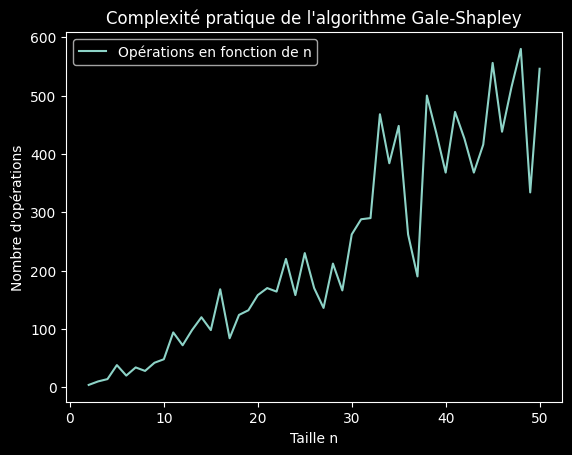

In [41]:
def galeShapley(p1Pref, p2Pref):
    """
    Renvoie un dictionnaire de mariages stables suivant l'algorithme de Gale-Shapley.
    Comptabilise les opérations réalisées.
    
    :param dictionnaire p1Pref: le dictionnaire des préférences des individus de P1
    :param dictionnaire p2Pref: le dictionnaire des préférences des individus de P2
    :return: dictionnaire de mariages stables et nombre d'opérations réalisées
    :rtype: dict, int
    """

    operations = 0  # Compteur d'opérations
    # Initialisation : tous les étudiants (P1) sont célibataires
    single_p1 = list(p1Pref.keys())  # Liste des individus de P1 non encore mariés
    marriage = {p1: -1 for p1 in p1Pref}  # Dictionnaire des mariages avec -1 pour les non mariés
    engaged = {p2: -1 for p2 in p2Pref}  # Les formations (P2) sont également célibataires au départ
    next_proposal = {p1: 0 for p1 in p1Pref}  # Garde une trace de la prochaine formation à proposer

    while single_p1:  # Tant qu'il y a des étudiants non mariés
        student = single_p1[0]  # Prendre un étudiant non marié
        # Trouver la prochaine formation à qui l'étudiant va proposer
        preferred_formation = p1Pref[student][next_proposal[student]]
        next_proposal[student] += 1  # On met à jour la prochaine proposition à faire
        operations += 1  # Compter la proposition
        
        # Si la formation est célibataire, elle accepte directement la proposition
        if engaged[preferred_formation] == -1:
            marriage[student] = preferred_formation
            engaged[preferred_formation] = student
            single_p1.pop(0)  # Cet étudiant est maintenant marié
            operations += 1  # Compter l'appariement
        else:
            # Si la formation est déjà mariée, elle doit comparer les préférences
            current_student = engaged[preferred_formation]
            operations += 1  # Compter la comparaison

            if p2Pref[preferred_formation].index(student) < p2Pref[preferred_formation].index(current_student):
                # La formation préfère le nouvel étudiant
                marriage[student] = preferred_formation
                marriage[current_student] = -1  # L'ancien étudiant devient célibataire
                single_p1[0] = current_student  # On remplace le célibataire actuel par l'ancien
                engaged[preferred_formation] = student  # La formation est maintenant engagée avec le nouvel étudiant
                operations += 2  # Compter l'appariement et le changement de célibataire

    return marriage, operations

# Étude de la complexité en pratique
def complexity_study(max_n):
    sizes = []
    operations = []
    
    for n in range(2, max_n + 1):
        p1Pref = dicoPrefGenerator(n)
        p2Pref = dicoPrefGenerator(n)
        _, ops = galeShapley(p1Pref, p2Pref)
        sizes.append(n)
        operations.append(ops)
    
    plt.plot(sizes, operations, label="Opérations en fonction de n")
    plt.xlabel("Taille n")
    plt.ylabel("Nombre d'opérations")
    plt.title("Complexité pratique de l'algorithme Gale-Shapley")
    plt.legend()
    plt.show()

# Tracer la complexité pour des valeurs allant jusqu'à 50
complexity_study(50)


On appelle "regret" de l'individu $i$ la position du partenaire après mariage dans la liste des préférence de $i$.
Par exemple, si la liste de préférence de notre individu est <tt>[0, 3, 2, 1, 4]</tt> et qu'il est marié avec 3, son regret est de 1. Par contre, s'il est marié avec 4, son regret est de 4. 
Plus le regret de $i$ est faible, plus le mariage est réussi pour $i$. Evidemment, le regret du partenaire est également à prendre en compte pour connaitre la réussite (absolue) du mariage ! 

> __Question 7 (Regret)__ : Ecrire une fonction `regret(mariage, e, p1Pref, p2Pref, isP1)` qui donne le regret de <tt>e</tt> étant donné le <tt>mariage</tt> et les listes de préférence. Attention, <tt>e</tt> appartient à $P_1$ si <tt>isP1</tt> est à <tt>True</tt> et à $P_2$ sinon. 

In [42]:
def regret(mariage, e, p1Pref, p2Pref, isP1):
    """
    Renvoie le regret de e étant donné le mariage et les listes de préférences.
    
    :param int e: indice d'un étudiant ou d'une formation
    :param dict mariage: résultat d'un mariage
    :param dict p1Pref: le dictionnaire des préférences des individus de P1
    :param dict p2Pref: le dictionnaire des préférences des individus de P2
    :param bool isP1: permet de connaitre la population d'appartenance de e
    :return: regret (position du partenaire dans la liste des préférences)
    :rtype: int
    """

    if isP1:
        # Si e appartient à P1, on récupère le partenaire (formation) du mariage
        partenaire = mariage[e]

        # Le regret est la position du partenaire dans la liste des préférences de e
        return p1Pref[e].index(partenaire)
    else:
        # Si e appartient à P2, on cherche l'étudiant associé à cette formation
        # On inverse le dictionnaire pour trouver le partenaire de la formation
        partenaire = next(p for p, f in mariage.items() if f == e)

        # Le regret est la position du partenaire dans la liste des préférences de la formation
        return p2Pref[e].index(partenaire)

try:
    e1Pref = {0:[4, 1, 2, 0, 3], 1:[2, 3, 0, 1, 4], 2:[4, 0, 1, 2, 3], 3:[3, 1, 4, 0, 2], 4:[3, 4, 1, 2, 0]}
    f1Pref = {1:[3, 4, 0, 2, 1], 2:[1, 3, 0, 4, 2], 3:[1, 4, 3, 2, 0], 0:[2, 1, 0, 3, 4], 4:[3, 1, 4, 2, 0]}
    mariage =  {0: 0, 1: 2, 2: 4, 3: 1, 4: 3} #Mariage obtenu par galeShapley
    assert regret(mariage,0,e1Pref, f1Pref, False ) == 2
    assert regret(mariage,4,e1Pref, f1Pref, False ) == 3 #L'universite 4 est avec l'etudiant 2 donc regret de 3
    assert regret(mariage,0,e1Pref, f1Pref, True ) == 3
    assert regret(mariage,1,e1Pref, f1Pref, True ) == 0
    print("regret : OK")
except:
    print("regret : ERREUR")
    

regret : OK


> __Question 8 (Regret, suite)__ : Ecrire une fonction `regrets(mariage, p1Pref, p2Pref)` qui renvoie une liste de deux dictionnaire : le première correspond au regrets des éléments de $P_1$ (étudiants) et le second aux regrets des éléments de $P_2$ (formations).
Par exemple :  `[{0: 3, 1: 0, 2: 0, 3: 1, 4: 0}, {1: 0, 2: 0, 3: 1, 0: 2, 4: 3}]` signifie que l'étudiant 0 a un regret de 3, l'étudiant 1 un regret de 0 etc. Et idem pour les formations : La formation 1 un regret de 0 etc.


In [43]:
def regrets(mariage, p1Pref, p2Pref):
    """
    Renvoie une liste des regrets des éléments de P1 et des regrets des éléments de P2.
    
    :param dict mariage: résultat d'un mariage
    :param dict p1Pref: le dictionnaire des préférences des individus de P1
    :param dict p2Pref: le dictionnaire des préférences des individus de P2
    :return: liste de deux dictionnaires : le premier avec les regrets de P1 et le deuxième avec les regrets de P2
    :rtype: list of dict
    """
    
    # Calculer les regrets pour les éléments de P1
    regretsP1 = {}

    for etudiant in p1Pref:
        partenaire = mariage[etudiant]  # Le partenaire de l'étudiant

        if partenaire not in p1Pref[etudiant]:
            print(f"Erreur : le partenaire {partenaire} de l'étudiant {etudiant} n'est pas dans ses préférences.")

        regret = p1Pref[etudiant].index(partenaire)  # La position du partenaire dans la liste des préférences
        regretsP1[etudiant] = regret
    
    # Calculer les regrets pour les éléments de P2
    regretsP2 = {}
    for formation in p2Pref:
        partenaire = next(etudiant for etudiant, form in mariage.items() if form == formation)  # Trouver le partenaire de la formation

        if partenaire not in p2Pref[formation]:
            print(f"Erreur : l'étudiant {partenaire} de la formation {formation} n'est pas dans ses préférences.")

        regret = p2Pref[formation].index(partenaire)  # La position de l'étudiant dans la liste des préférences de la formation
        regretsP2[formation] = regret
    
    return [regretsP1, regretsP2]

try:
    e1Pref = {0:[4, 1, 2, 0, 3], 1:[2, 3, 0, 1, 4], 2:[4, 0, 1, 2, 3], 3:[3, 1, 4, 0, 2], 4:[3, 4, 1, 2, 0]}
    f1Pref = {1:[3, 4, 0, 2, 1], 2:[1, 3, 0, 4, 2], 3:[1, 4, 3, 2, 0], 0:[2, 1, 0, 3, 4], 4:[3, 1, 4, 2, 0]}
    mariage =  {0: 0, 1: 2, 2: 4, 3: 1, 4: 3} #Mariage obtenu par galeShapley 2, 1, 2, 2],
    assert regrets(mariage, e1Pref, f1Pref) == [{0: 3, 1: 0, 2: 0, 3: 1, 4: 0}, {1: 0, 2: 0, 3: 1, 0: 2, 4: 3}]
    print("regrets : OK")
except:
    print("regrets : ERREUR")


regrets : OK


> __Question 9 (Indicateurs de regret)__ : Calculer les regrets sur plusieurs exemples, quels indicateurs vous semblent pertinents ? Comment évoluent les regrets avec la tailles des populations ? 

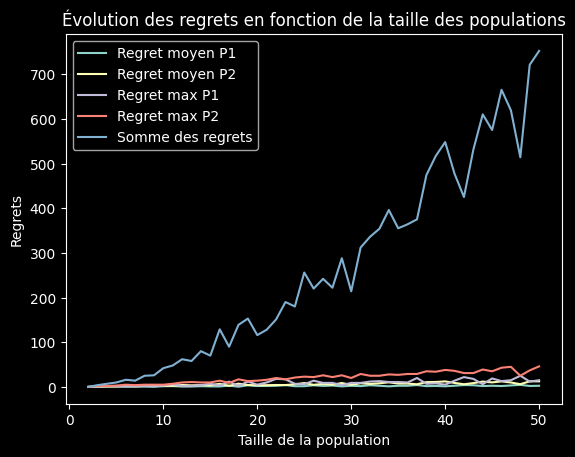

In [44]:
# Correction de l'algo de Gale-Shapley pour ajouter des vérifications (si le partenaire est bien dans les préférences)
def galeShapley(p1Pref, p2Pref):
    """
    Implémentation de l'algorithme de Gale-Shapley pour générer des mariages stables.
    Les individus de P1 (étudiants) font des propositions aux individus de P2 (formations).
    
    :param dict p1Pref: Dictionnaire des préférences des individus de P1
    :param dict p2Pref: Dictionnaire des préférences des individus de P2
    :return: Dictionnaire des mariages (clé = étudiant de P1, valeur = formation de P2)
    :rtype: dict
    """

    # Liste des étudiants célibataires
    single_p1 = list(p1Pref.keys())
    # Initialisation des mariages (au début, tout le monde est célibataire)
    marriage = {p1: -1 for p1 in p1Pref}  # Les étudiants de P1 sont non mariés au départ
    engaged = {p2: -1 for p2 in p2Pref}   # Les formations de P2 sont non mariées
    # Garder une trace du nombre de propositions faites par chaque étudiant
    next_proposal = {p1: 0 for p1 in p1Pref}
    
    while single_p1:  # Tant qu'il y a des étudiants célibataires
        student = single_p1[0]  # On prend le premier étudiant célibataire
        # Trouver la formation à qui il va faire une proposition
        preferred_formation = p1Pref[student][next_proposal[student]]
        next_proposal[student] += 1  # Incrémenter l'index pour la prochaine proposition

        # Si la formation est célibataire, elle accepte la proposition
        if engaged[preferred_formation] == -1:
            marriage[student] = preferred_formation
            engaged[preferred_formation] = student
            single_p1.pop(0)  # Cet étudiant est maintenant marié, on le retire des célibataires
        else:
            # Si la formation est déjà mariée, elle compare le nouvel étudiant avec son actuel partenaire
            current_student = engaged[preferred_formation]
            
            # Si la formation préfère le nouvel étudiant à son actuel partenaire
            if p2Pref[preferred_formation].index(student) < p2Pref[preferred_formation].index(current_student):
                # La formation change de partenaire
                marriage[student] = preferred_formation
                marriage[current_student] = -1  # L'ancien partenaire devient célibataire
                single_p1[0] = current_student  # L'ancien partenaire devient célibataire, on le réajoute
                engaged[preferred_formation] = student  # La formation accepte le nouvel étudiant
            else:
                # Si la formation préfère rester avec son actuel partenaire, l'étudiant reste célibataire
                pass
    
    return marriage

# Fonction pour calculer les regrets (ajout de vérifications)
def regrets(mariage, p1Pref, p2Pref):
    regretsP1 = {}
    regretsP2 = {}
    
    for etudiant in p1Pref:
        partenaire = mariage[etudiant]

        # Ajout d'une vérification : est-ce que le partenaire est bien dans la liste de préférences ?
        if partenaire not in p1Pref[etudiant]:
            print(f"Erreur : le partenaire {partenaire} de l'étudiant {etudiant} n'est pas dans ses préférences.")

        regret = p1Pref[etudiant].index(partenaire)
        regretsP1[etudiant] = regret
    
    for formation in p2Pref:
        partenaire = next(etudiant for etudiant, form in mariage.items() if form == formation)

        # Ajout d'une vérification : est-ce que l'étudiant est bien dans la liste de préférences de la formation ?
        if partenaire not in p2Pref[formation]:
            print(f"Erreur : l'étudiant {partenaire} de la formation {formation} n'est pas dans ses préférences.")

        regret = p2Pref[formation].index(partenaire)
        regretsP2[formation] = regret
    
    return [regretsP1, regretsP2]

# Fonction pour calculer les indicateurs de regrets
def calculate_indicators(n):
    p1Pref = dicoPrefGenerator(n)
    p2Pref = dicoPrefGenerator(n)
    mariage = galeShapley(p1Pref, p2Pref)
    rP1, rP2 = regrets(mariage, p1Pref, p2Pref)
    # Calcul des indicateurs pour P1
    avg_regret_p1 = sum(rP1.values()) / n
    max_regret_p1 = max(rP1.values())
    # Calcul des indicateurs pour P2
    avg_regret_p2 = sum(rP2.values()) / n
    max_regret_p2 = max(rP2.values())
    # Somme des regrets
    total_regret = sum(rP1.values()) + sum(rP2.values())
    
    return avg_regret_p1, max_regret_p1, avg_regret_p2, max_regret_p2, total_regret

# Fonction pour tracer l'évolution des indicateurs en fonction de la taille de la population
def study_regret_evolution(max_n):
    sizes = []
    avg_regrets_p1 = []
    avg_regrets_p2 = []
    max_regrets_p1 = []
    max_regrets_p2 = []
    total_regrets = []
    
    for n in range(2, max_n + 1):
        avg_p1, max_p1, avg_p2, max_p2, total_r = calculate_indicators(n)
        sizes.append(n)
        avg_regrets_p1.append(avg_p1)
        avg_regrets_p2.append(avg_p2)
        max_regrets_p1.append(max_p1)
        max_regrets_p2.append(max_p2)
        total_regrets.append(total_r)
    
    plt.plot(sizes, avg_regrets_p1, label="Regret moyen P1")
    plt.plot(sizes, avg_regrets_p2, label="Regret moyen P2")
    plt.plot(sizes, max_regrets_p1, label="Regret max P1")
    plt.plot(sizes, max_regrets_p2, label="Regret max P2")
    plt.plot(sizes, total_regrets, label="Somme des regrets")
    plt.xlabel("Taille de la population")
    plt.ylabel("Regrets")
    plt.title("Évolution des regrets en fonction de la taille des populations")
    plt.legend()
    plt.show()

# Tracer l'évolution pour des tailles de population jusqu'à 50
study_regret_evolution(50)


> __Question 10 (Conclusion)__ : Qu'en concluez vous ? 

En conclusion, à mesure que la taille des populations augmente :
- Regret moyen : Il peut rester relativement stable si les préférences sont équilibrées, mais il peut aussi augmenter légèrement avec la taille des populations.
- Regret maximum : Peut augmenter avec la taille des populations car, dans un grand groupe, il est plus probable qu'un individu se retrouve loin de son partenaire idéal.
- Somme des regrets : Comme attendu, cette mesure augmente avec la taille des populations. Elle croît généralement de manière plus linéaire.  

Dans l'ensemble, l'algorithme de Gale-Shapley garantit des mariages stables, mais il ne minimise pas nécessairement les regrets individuels.